In [1]:
import ocel
import networkx as nx
import matplotlib.pyplot as plt
import ocel_features.analysis.plot_graphs as pg
import ocel_features.util.decompositions as d
import ocel_features.util.multigraph as mg
from datetime import timedelta
from pprint import pprint
from copy import copy
from collections import Counter

In [11]:
log = ocel.import_log('../logs/running-example.jsonocel')
relations = {mg.Relations.DESCENDANTS, mg.Relations.COBIRTH}
graph = mg.create_object_centric_graph(log, relations)

0/22367 events processed.
1000/22367 events processed.
2000/22367 events processed.
3000/22367 events processed.
4000/22367 events processed.
5000/22367 events processed.
6000/22367 events processed.
7000/22367 events processed.
8000/22367 events processed.
9000/22367 events processed.
10000/22367 events processed.
11000/22367 events processed.
12000/22367 events processed.
13000/22367 events processed.
14000/22367 events processed.
15000/22367 events processed.
16000/22367 events processed.
17000/22367 events processed.
18000/22367 events processed.
19000/22367 events processed.
20000/22367 events processed.
21000/22367 events processed.
22000/22367 events processed.
Graph done!


In [12]:
# log['ocel:global-log']['ocel:object-types'] = {'Offer', 'Application', 'Resource'}
print(log['ocel:global-log']['ocel:object-types'])
curr_d = d.decomp_time_relations(log, graph, d.Decompositions.GLOBAL_RELATION)

['customers', 'items', 'orders', 'packages', 'products']
[[  0 131 131  81   2]
 [  0   0   0   1   0]
 [  0   0   0   6   0]
 [  0   0   0   0   0]
 [  5 396 396 373   4]]


The decomposition removes 58133 / 124990 (46.51%) of edges
83


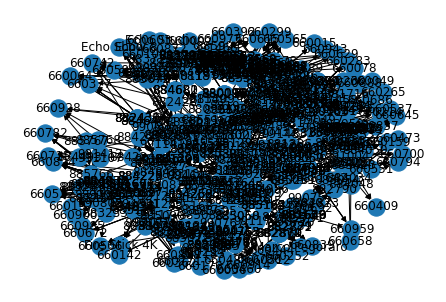

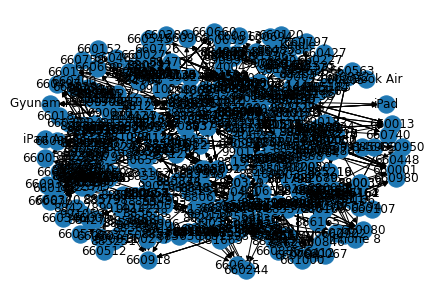

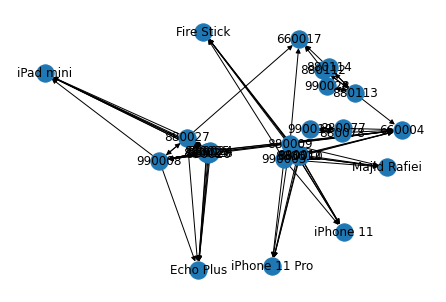

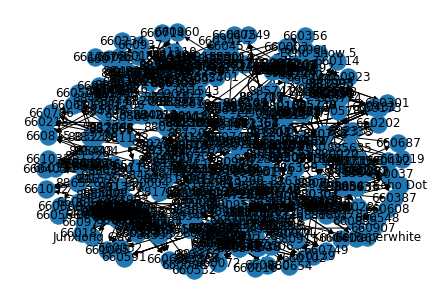

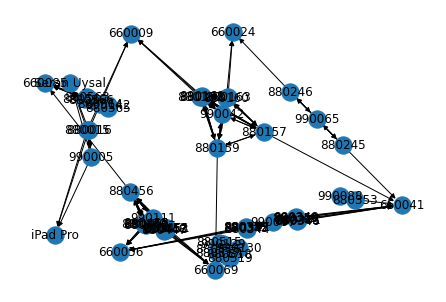

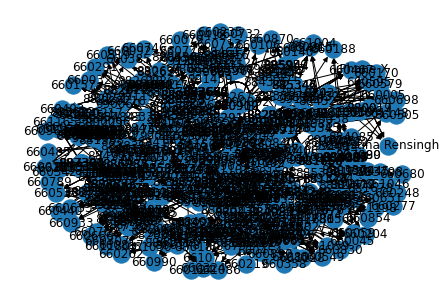

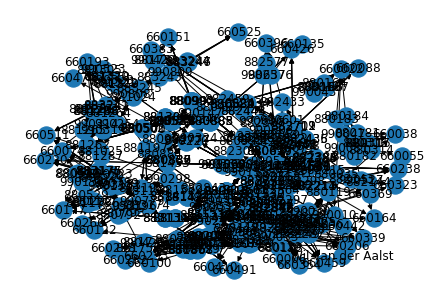

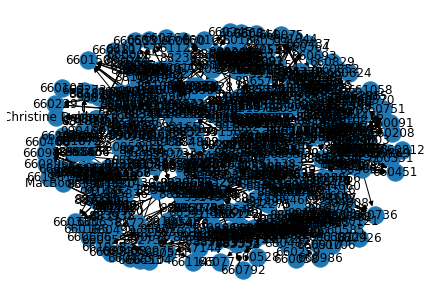

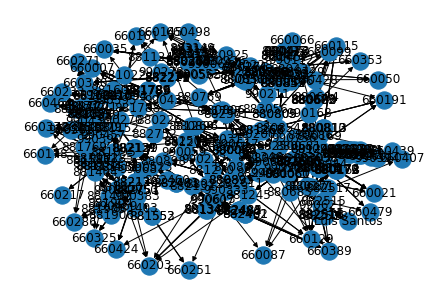

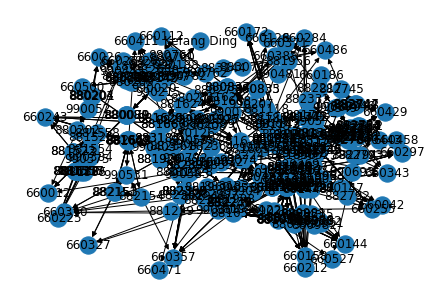

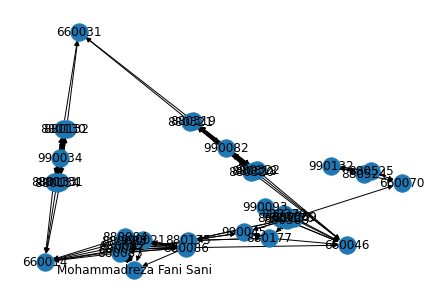

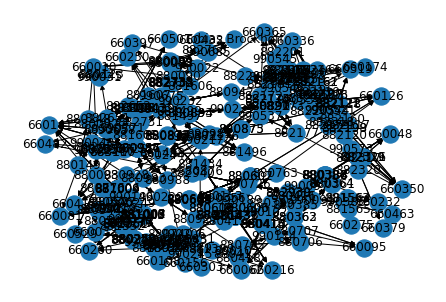

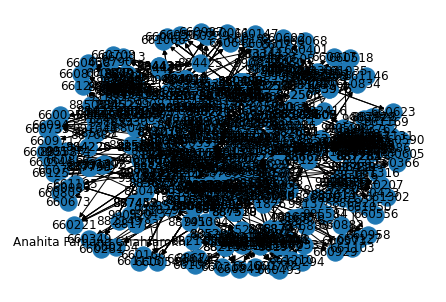

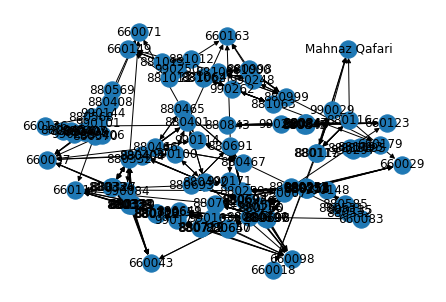

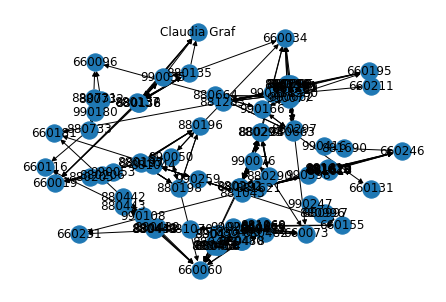

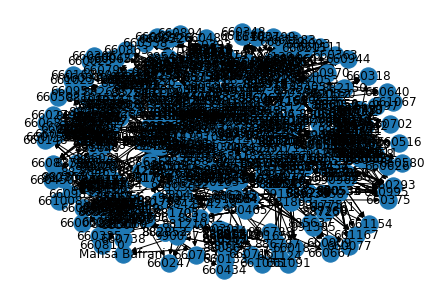

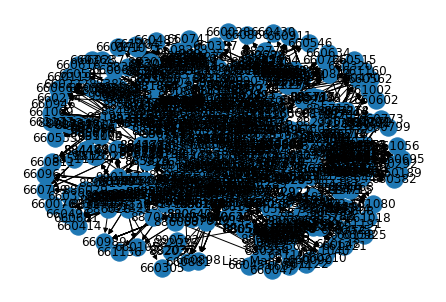

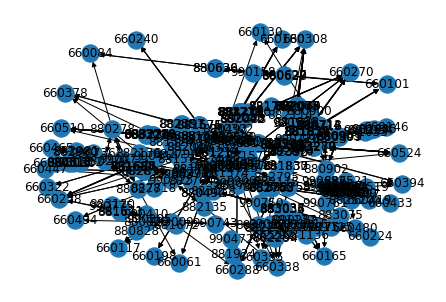

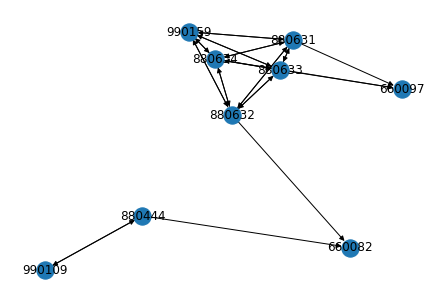

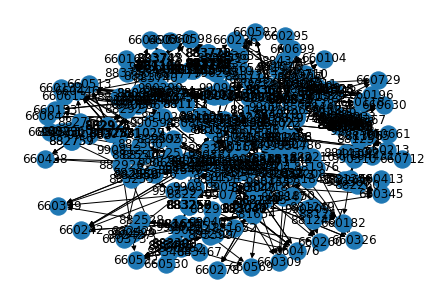

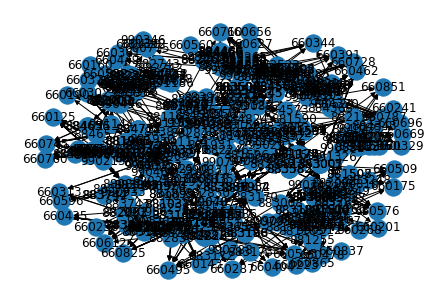

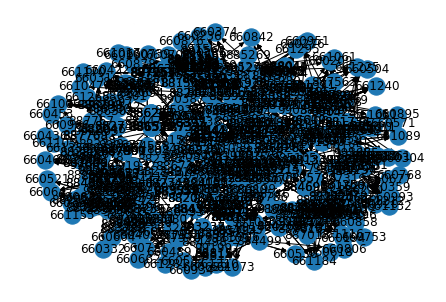

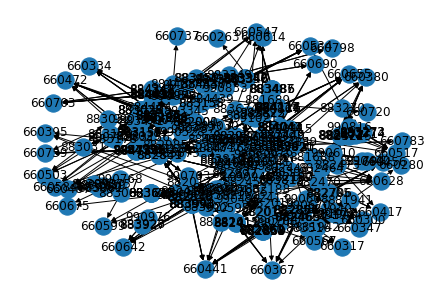

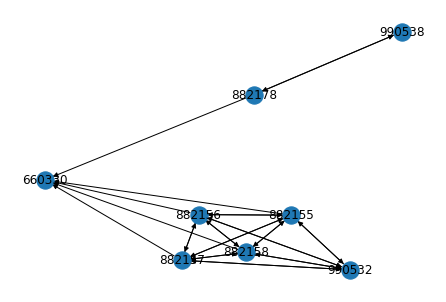

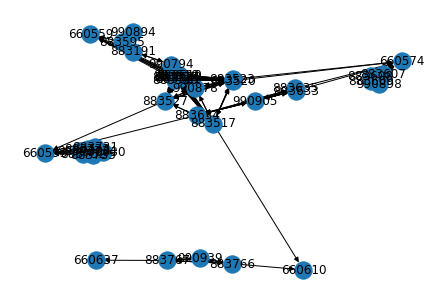

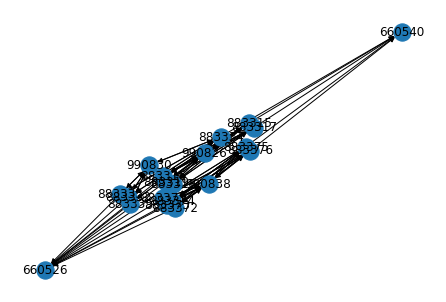

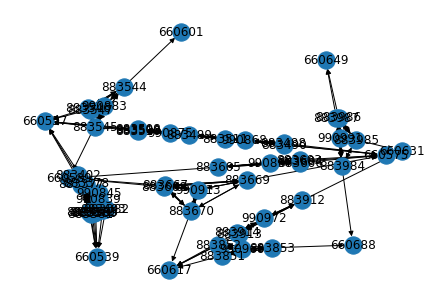

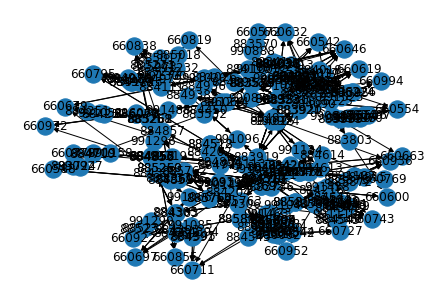

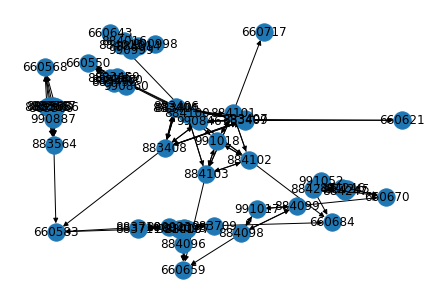

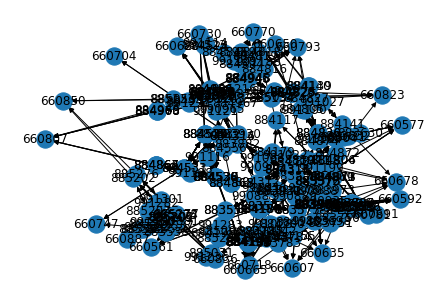

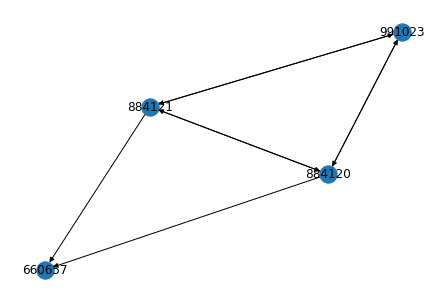

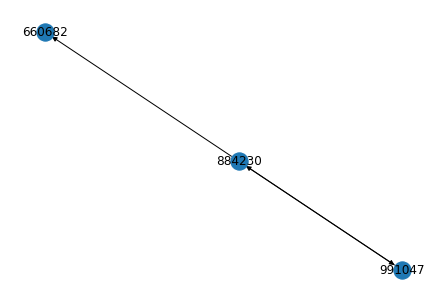

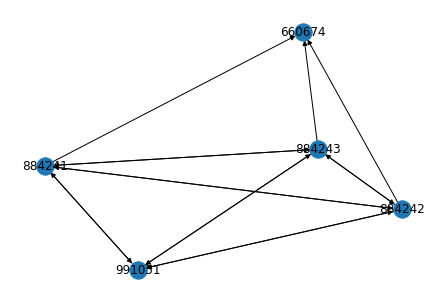

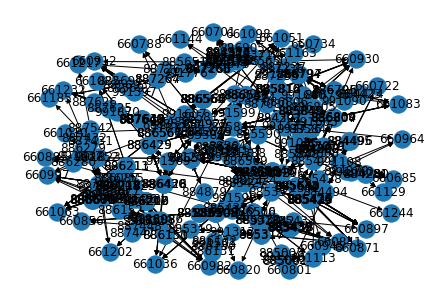

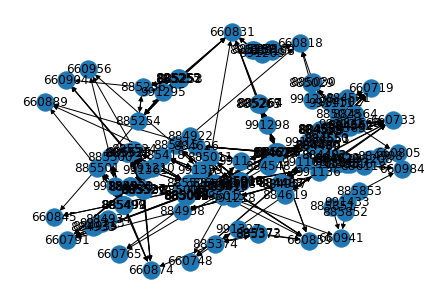

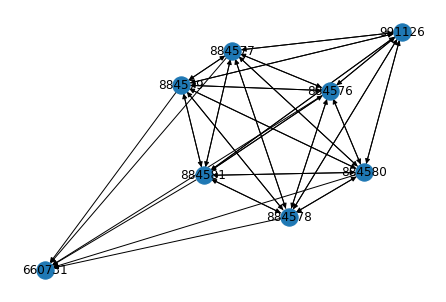

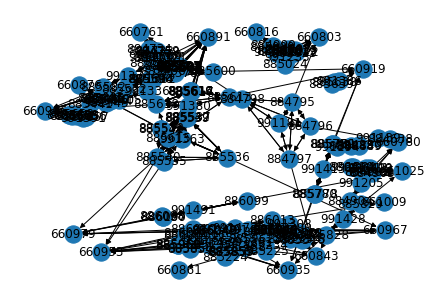

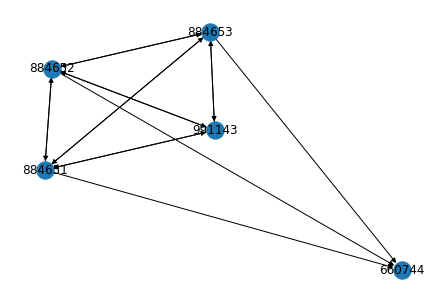

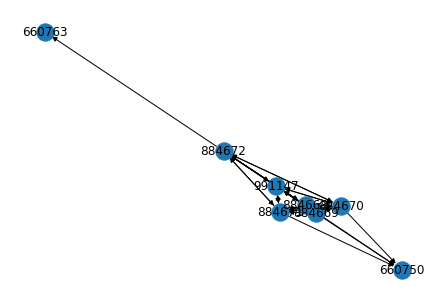

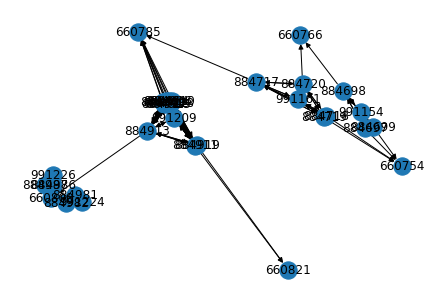

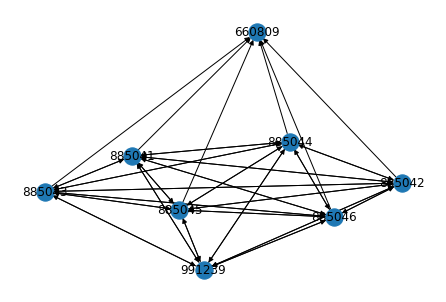

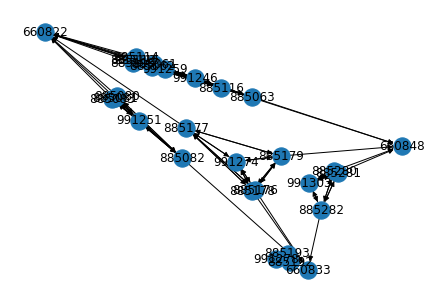

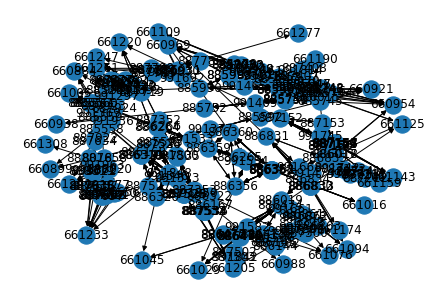

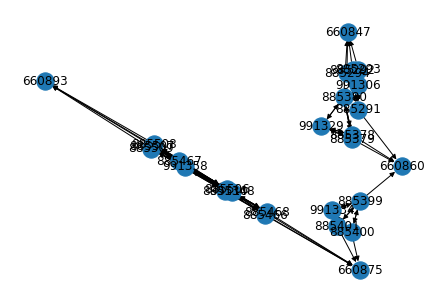

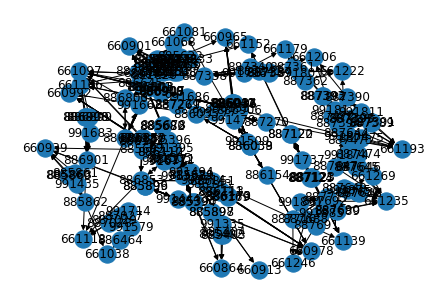

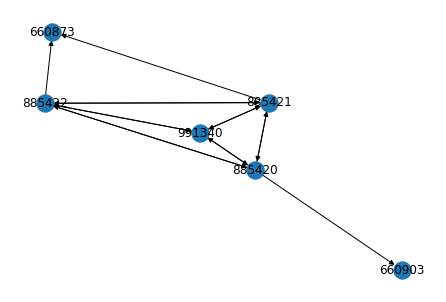

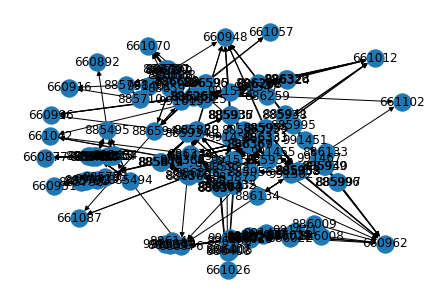

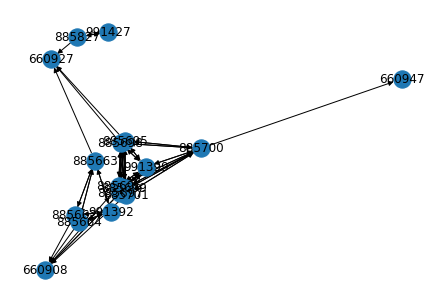

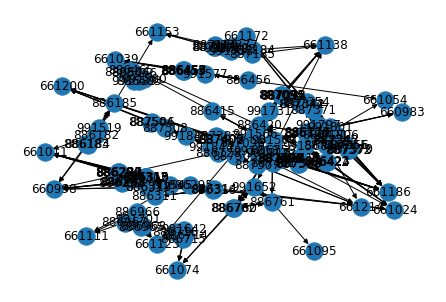

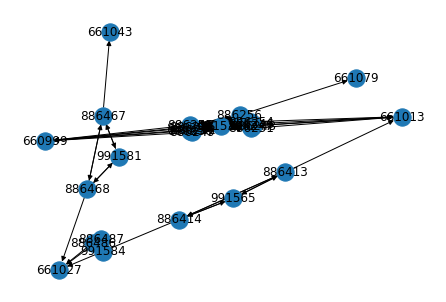

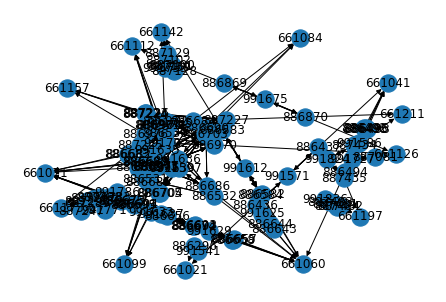

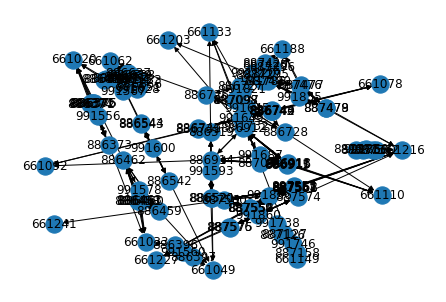

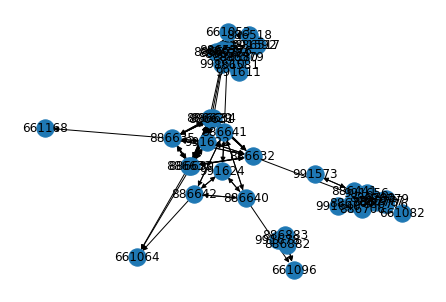

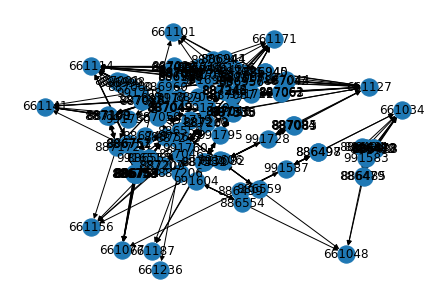

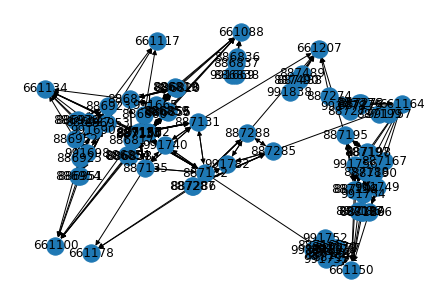

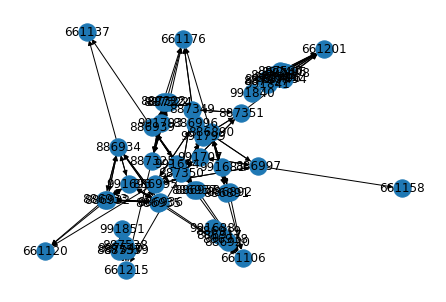

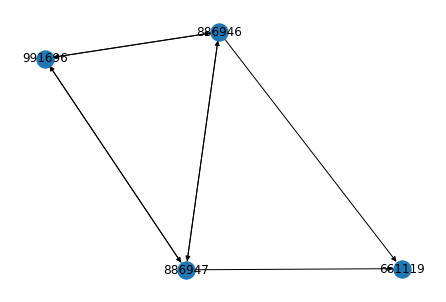

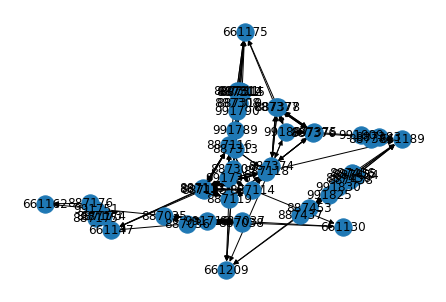

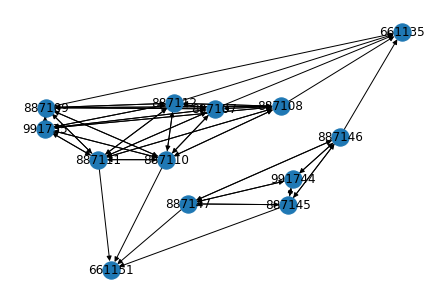

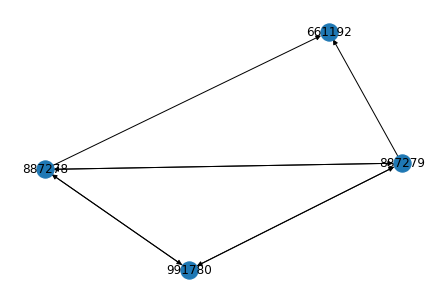

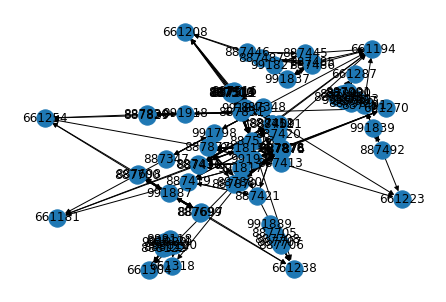

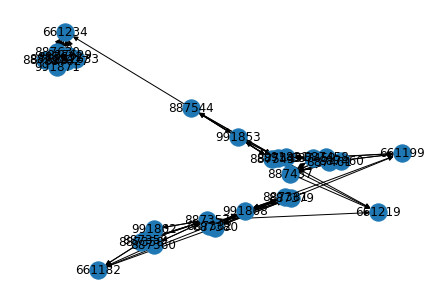

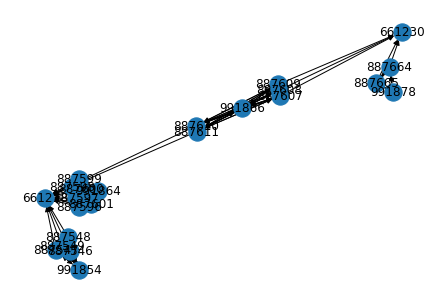

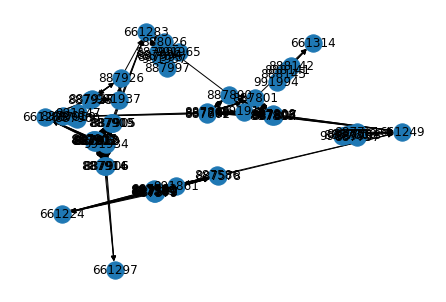

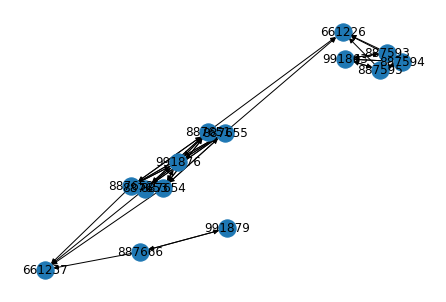

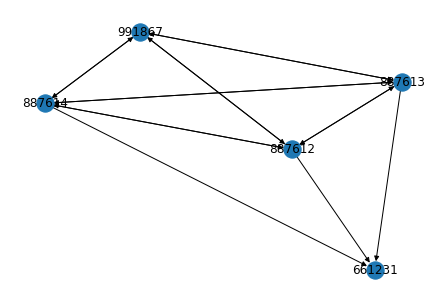

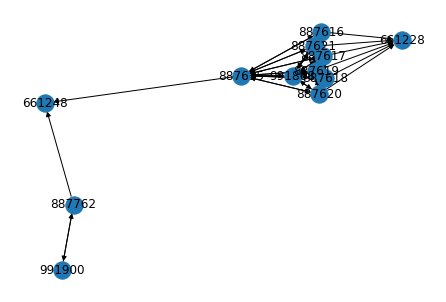

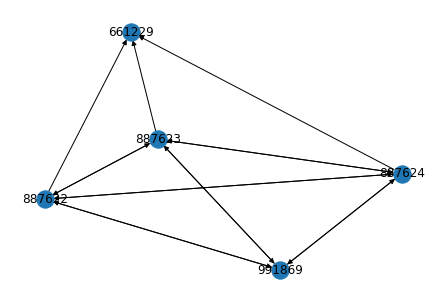

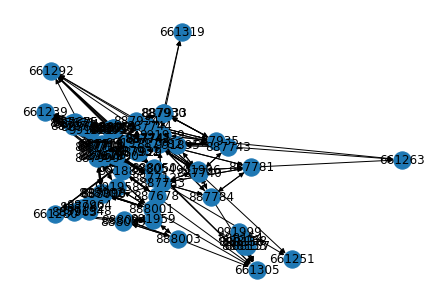

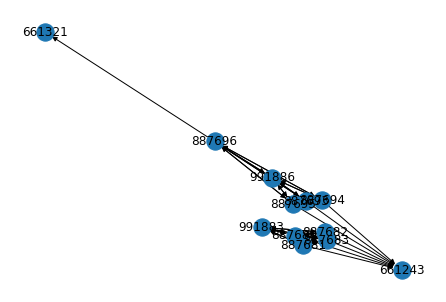

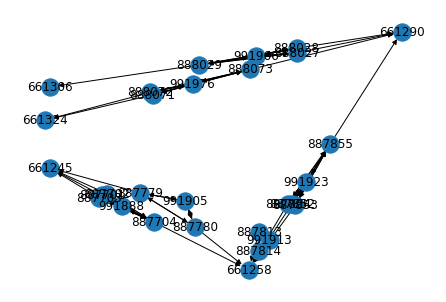

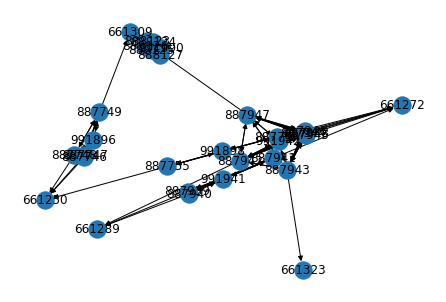

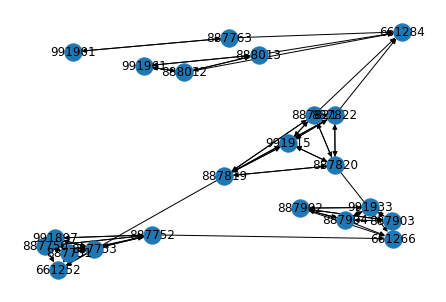

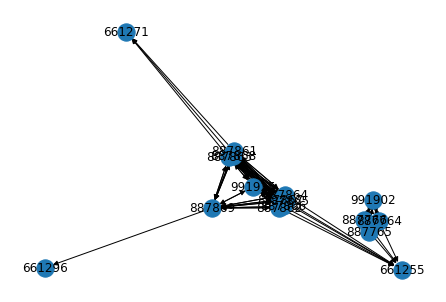

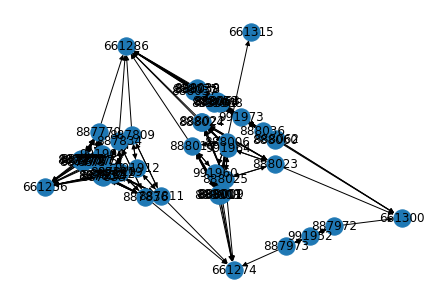

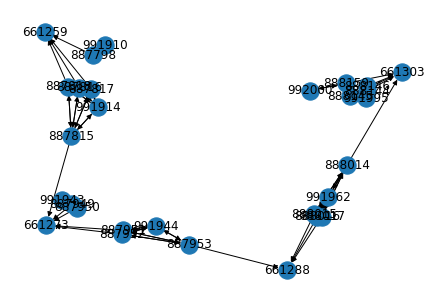

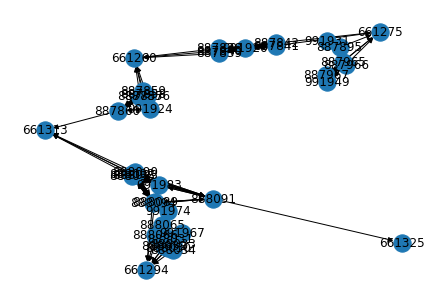

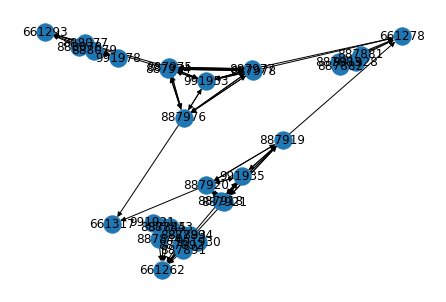

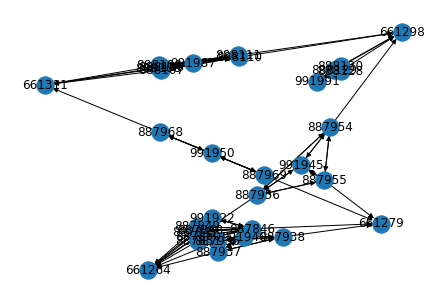

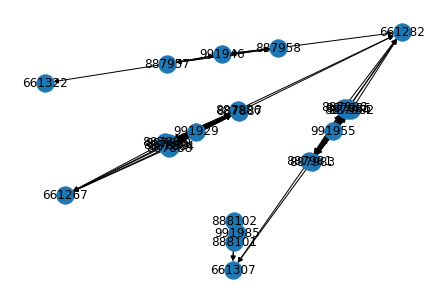

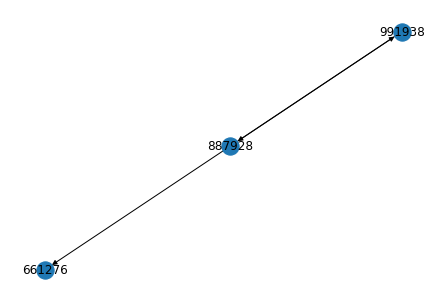

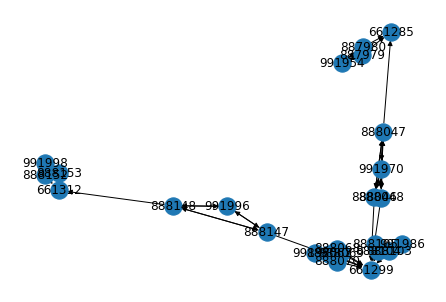

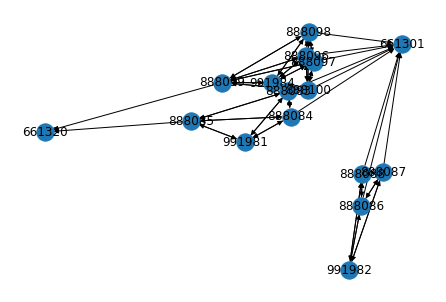

In [13]:
# make sure something is being done
print(f'The decomposition removes {len(curr_d.edges())} / {len(graph.edges())} ({round((len(curr_d.edges())/ len(graph.edges()))*100, 2)}%) of edges')

# create subgraphs
subgraphs = d.get_disconnected_subgraphs(curr_d)
print(len(subgraphs))
for g in subgraphs:
    pg.show_graph_plt(g)
